<a href="https://colab.research.google.com/github/pkoneill/VisualizingBrainWaves/blob/main/Visualizing_Brain_Waves_EEG_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
It's time to put everything that we've learned today together! You'll be working with data collected just yesterday from a 2-channel EEG (the one you saw in the live demo). We made this EEG using this [Instructables](https://www.instructables.com/DIY-EEG-and-ECG-Circuit/) and you can too!

<img src='https://github.com/pkoneill/VisualizingBrainWaves/blob/main/EEGs v1 v2.png?raw=1' width=400px>


# Objectives

In this tutorial, you will learn how to import data files that contain EEG signals collected from a human subject when:


*   Subject's eyes are open and they are watching Youtube videos (9 trials)

*   Subject's eyes are closed and they're practicing meditation (9 trials)

But the labels 'open' or 'closed' were lost in an unfortunate reboot incident :}! Your goal is to determine which of the trials correspond to each state (some are perhaps indistinguishable). 



## Imports and helper functions
We'll  begin by importing some Python packages needed for this session. Please execute the cells below to initialize the notebook environment.


In [ ]:
#@title Import packages
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [ ]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/master/mplsettings")

def setup_graph(title='', x_label='', y_label='', fig_size=None):

    # Set DPI >=150 for readability and adjust figsize
    fig = plt.figure( figsize=(3,1.5), dpi=150 )

    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1] )
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout() # To ensure everything fits

In [ ]:
#@title Custom EEG FFT code and data loading
# Custom EEG FFT function #
def eegfft( input ):
  fft_output = np.fft.rfft( input )
  magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
  
  return magnitude

#Import data into a table (manually)
alert_eeg = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data0.csv',header=None).iloc[:,1].values
resting_eeg = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data17.csv',header=None).iloc[:,1].values

#@title Import more data
#Import data into a table (Pythonic, using a list comprehension)
all_data = [ pd.read_csv(f'https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data{i}.csv',header=None).iloc[:,1].values for i in range( 16 ) ]

scrambled_data = list()
[ scrambled_data.append( all_data[k] ) for k in [1,10,12,3,7,9] ]

alert_eeg = alert_eeg[0:573300]
resting_eeg = resting_eeg[0:573300]

numSamples = len( alert_eeg )
sRate = 44100

frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

# In the cell below we will plot the first five seconds of the data
Using the EEG 44100 data points were recorded each second (WOW, fast!)

There are 13 seconds of data in total. Feel free to look at different windows.

(-11024.95, 231523.95, -32123.3, 32123.3)

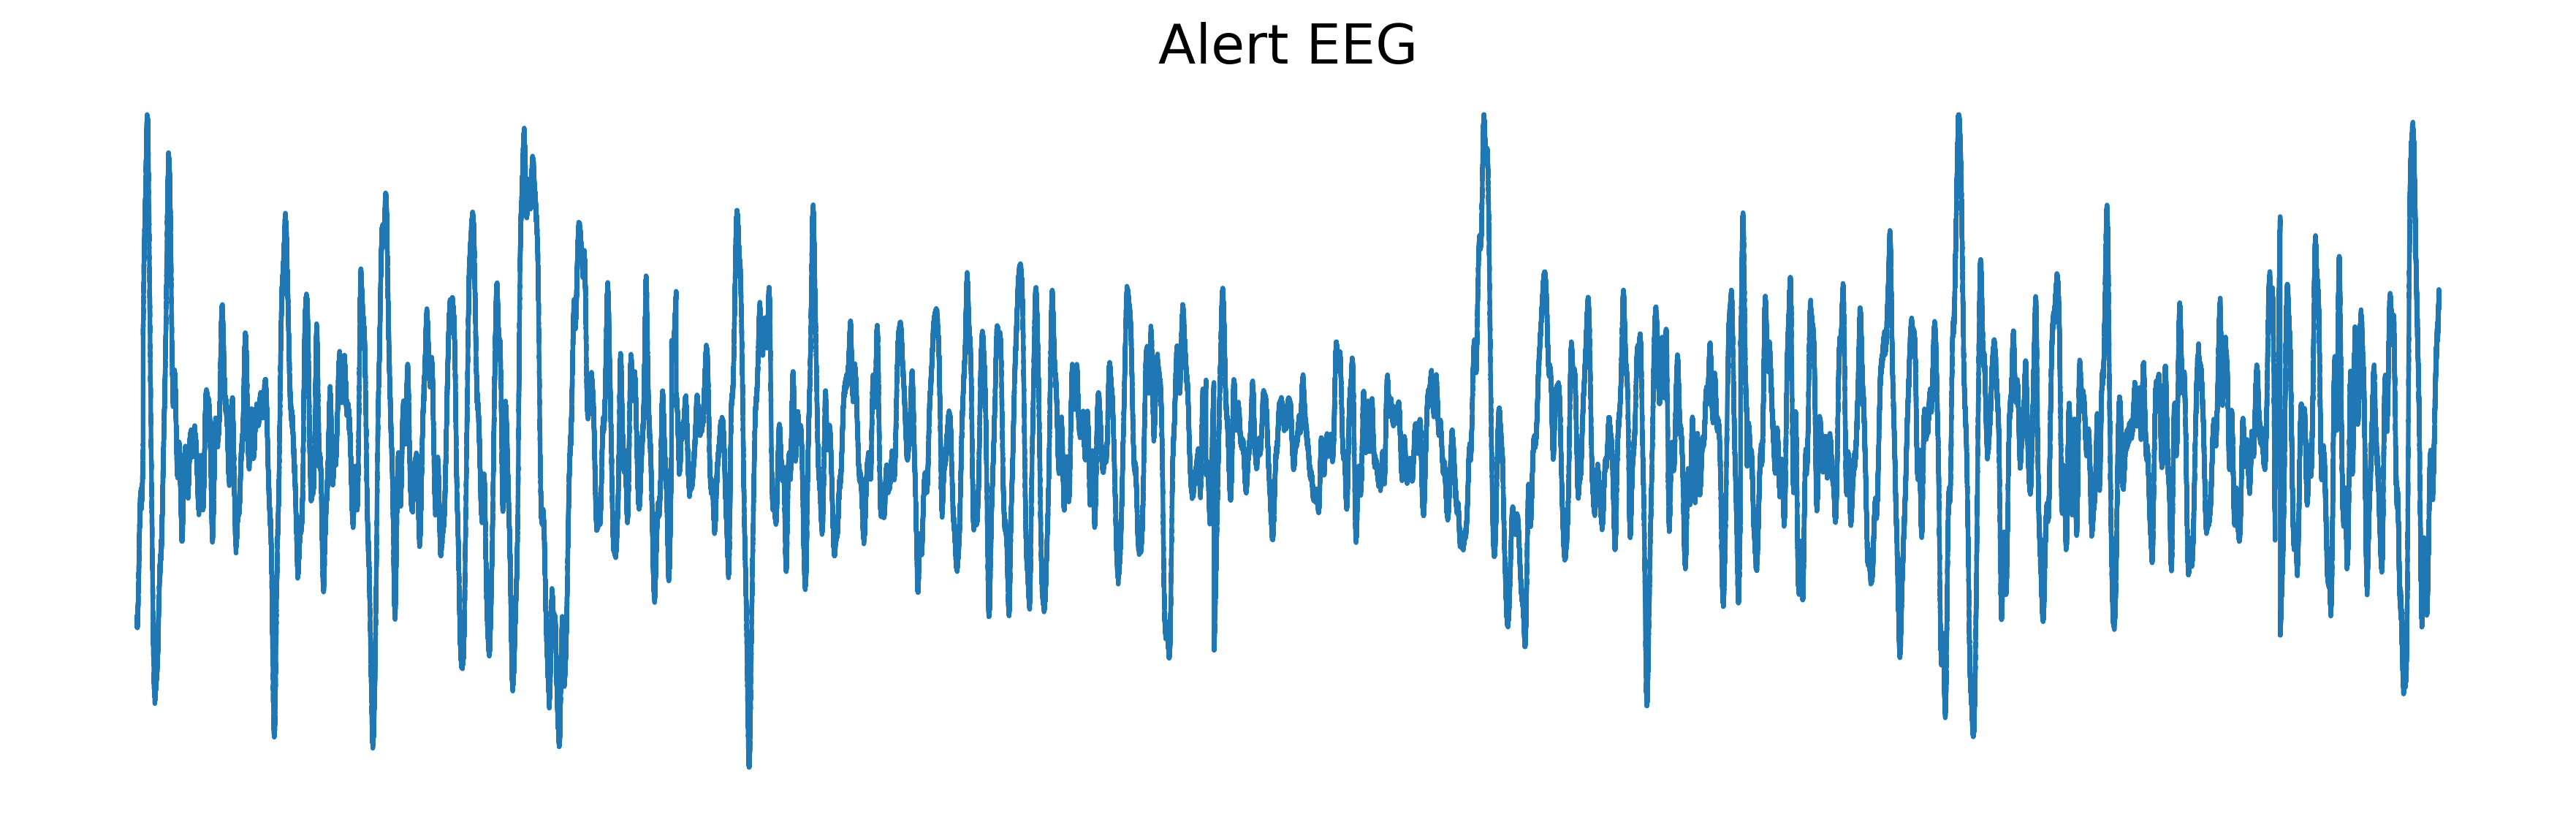

In [ ]:
setup_graph(x_label='Time', y_label='Amplitude', 
            title='Alert EEG', fig_size=(12,4))

plt.plot( alert_eeg[0:5*44100] )
ax = plt.gca()
ax.axes.axis('off')

Now press the + Code button at the top, and type in the code needed to plot the EEG taken from a restful subject.

The data is contained in the variable restful_eeg

# In the following section, you will look at six recordings and try to identify whether they are alert or sleepy based on the EEG.

In [ ]:
plt.figure(figsize=(15,10),dpi=120)

for index, this_fft in enumerate(scrambled_data):
    plt.subplot(6, 1, index + 1)
    plt.plot(scrambled_data[index][0:5*44100])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EEG: %i\n' % index, fontsize = 10)
    ax = plt.gca()
    ax.axes.axis('off')

# In the next section, we will plot the spectrum instead.

In [ ]:
setup_graph(x_label='frequency [Hz]', y_label='Amplitude', 
            title='Alert EEG', fig_size=(5,4))

magnitude = eegfft( alert_eeg )
plt.plot(frequencies, magnitude, 'dodgerblue')
plt.xlim(0, 60)

In [ ]:
setup_graph(x_label='Frequency [Hz]', y_label='Amplitude', 
            title='Resting EEG', fig_size=(5,4))

magnitude = eegfft( resting_eeg )
plt.plot(frequencies, magnitude, 'dodgerblue')
# Play with different settings for the xlim to see which frequencies are present
plt.xlim(0, 60) # Currently set to 60, but try smaller or larger values as well

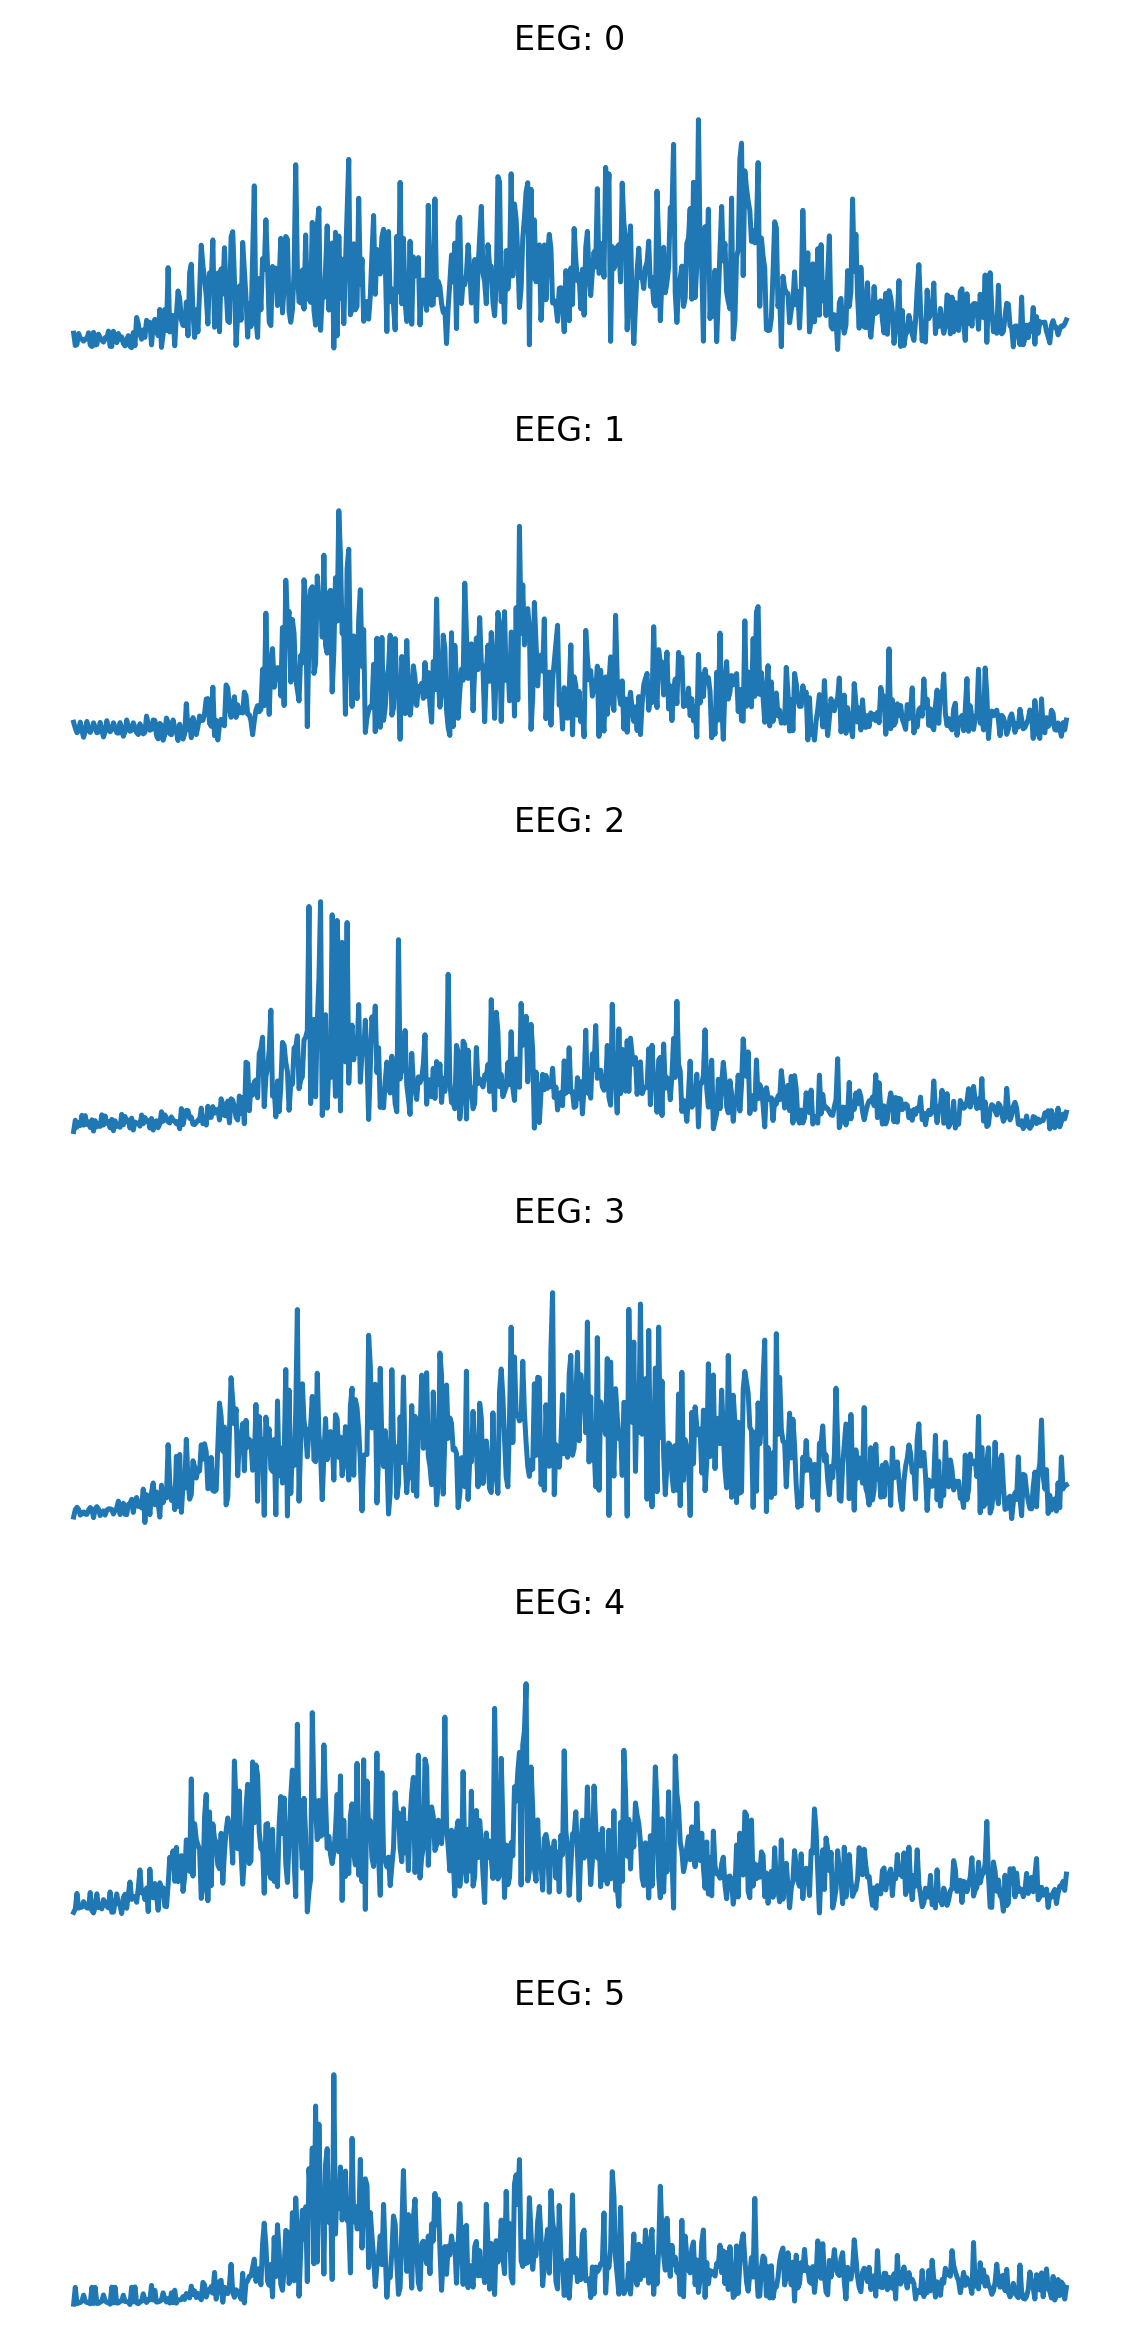

In [ ]:
subset_frequencies = frequencies[0:600]

plt.figure(figsize=(5,10),dpi=120)

for index, this_fft in enumerate(scrambled_data):
    plt.subplot(6, 1, index + 1)
    eeg_fft = eegfft(this_fft)
    plt.plot(subset_frequencies, eeg_fft[0:600] )
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EEG: %i\n' % index, fontsize = 10)
    ax = plt.gca()
    ax.axes.axis('off')